In [202]:
# !pip install tensorflow

# !pip install opencv-python

In [203]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [204]:
# 1️⃣ Cargar y preparar las imágenes (deben estar en carpetas separadas: 'gatos/' y 'perros/')
# data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalizar imágenes


data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,       # Rota las imágenes hasta 30 grados
    width_shift_range=0.2,   # Mueve horizontalmente la imagen
    height_shift_range=0.2,  # Mueve verticalmente la imagen
    shear_range=0.2,         # Aplica transformaciones de corte
    zoom_range=0.2,          # Aplica zoom
    horizontal_flip=True,     # Invierte horizontalmente las imágenes
    validation_split=0.2
)

train_data = data_gen.flow_from_directory(
    r'C:\Users\lucia.alvarez\Github\Data_Analytics\Practico_IA_2025\Imagenes',  # 📂 Carpeta donde están las imágenes
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Solo dos categorías (gatos y perros)
    subset='training')

val_data = data_gen.flow_from_directory(
    r'C:\Users\lucia.alvarez\Github\Data_Analytics\Practico_IA_2025\Imagenes',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 22 images belonging to 2 classes.


Found 4 images belonging to 2 classes.


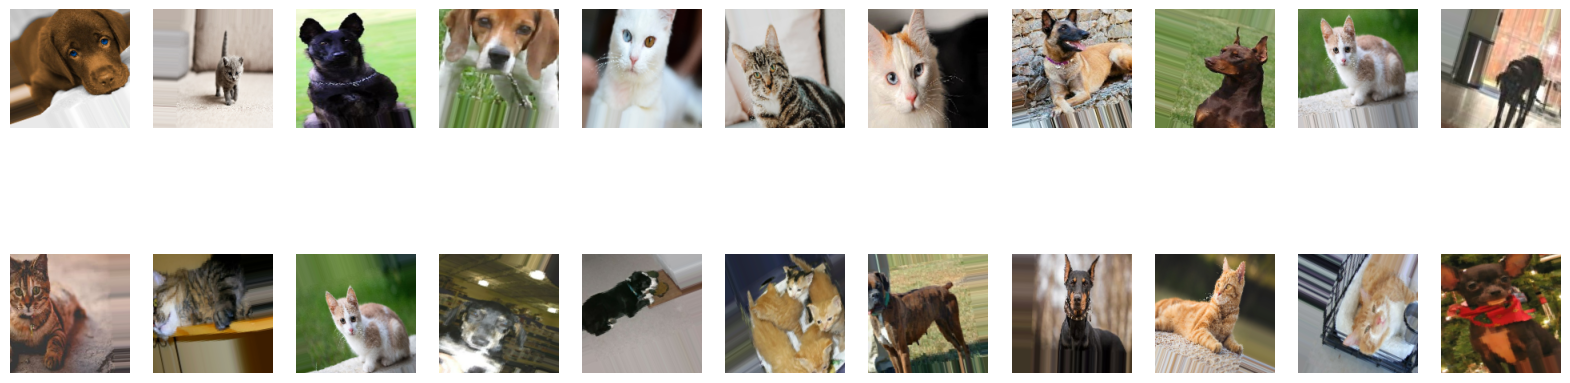

In [205]:
import matplotlib.pyplot as plt
images, labels = next(train_data)

plt.figure(figsize=(20,9))
for i in range(22):
    plt.subplot(3, 11, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


In [206]:
# 2️⃣ Crear el modelo de IA
modelo = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01))  # 1 salida (gato o perro)
])

# modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

modelo.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),  # Reducida de 0.0001 a 0.00001
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\lucia.alvarez\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [207]:

# 3️⃣ Entrenar el modelo
historial = modelo.fit(train_data, validation_data=val_data, epochs=10, batch_size=16)

c:\Users\lucia.alvarez\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3636 - loss: 0.7205 - val_accuracy: 0.2500 - val_loss: 0.7306
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step - accuracy: 0.5909 - loss: 0.7088 - val_accuracy: 0.5000 - val_loss: 0.7051
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step - accuracy: 0.5909 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.7380
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step - accuracy: 0.5909 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.7085
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step - accuracy: 0.6818 - loss: 0.6780 - val_accuracy: 0.5000 - val_loss: 0.7183
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step - accuracy: 0.7273 - loss: 0.6675 - val_accuracy: 0.5000 - val_loss: 0.6273
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - accuracy: 0.6364 - loss: 0.6613 - val_accuracy: 0.5000 - val_loss: 0.7225
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 0.7727 - loss: 0.6460 - val_accuracy: 0.2500 - val_loss: 0.

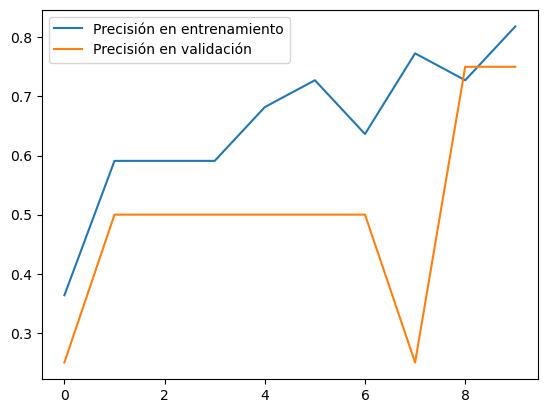

In [208]:
# 4️⃣ Evaluar el modelo
plt.plot(historial.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión en validación')
plt.legend()
plt.show()

In [209]:
# 5️⃣ Probar con una nueva imagen
def predecir_imagen(ruta):
    imagen = cv2.imread(ruta)
    imagen = cv2.resize(imagen, (150, 150))
    imagen = np.expand_dims(imagen, axis=0) / 255.0  
    prediccion = modelo.predict(imagen)
    return "Perro" if prediccion > 0.5 else "Gato"


In [210]:
# Prueba con una imagen de perro
test_image_1 = "C:/Users/lucia.alvarez/Github/Data_Analytics/Practico_IA_2025/Test_imagenes/test_1.jpg"  # Es gato
print(f"La IA predice: {predecir_imagen(test_image_1)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
La IA predice: Perro


In [211]:
# Prueba con una imagen de perro
test_image_2 = "C:/Users/lucia.alvarez/Github/Data_Analytics/Practico_IA_2025/Test_imagenes/test_2.jpg"   # Es perro
print(f"La IA predice: {predecir_imagen(test_image_2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
La IA predice: Gato


In [212]:
# Prueba con una imagen de perro
test_image_3 = "C:/Users/lucia.alvarez/Github/Data_Analytics/Practico_IA_2025/Test_imagenes/test_3.jpg"   # Es perro
print(f"La IA predice: {predecir_imagen(test_image_3)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
La IA predice: Perro


In [213]:
# Prueba con una imagen de perro
test_image_4 = "C:/Users/lucia.alvarez/Github/Data_Analytics/Practico_IA_2025/Test_imagenes/test_4.jpg"  # Es gato
print(f"La IA predice: {predecir_imagen(test_image_4)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La IA predice: Gato


In [214]:
# Acceder a las imágenes de la primera tanda (batch)
file_names = train_data.filenames  # Lista con las rutas de las imágenes leídas

print("\n📂 Imágenes utilizadas en el entrenamiento:")
for i, file in enumerate(file_names[:100], 1):
    print(f"{i}. {file}")  


📂 Imágenes utilizadas en el entrenamiento:
1. Gato\Cat_2.jpg
2. Gato\Cat_3.jpg
3. Gato\Cat_4.jpg
4. Gato\Cat_5.jpg
5. Gato\Cat_6.jpg
6. Gato\Cat_7.jpg
7. Gato\Cat_8.jpg
8. Gato\Cat_9.jpg
9. Gato\PetImages_gato_1.png
10. Gato\PetImages_gato_2.png
11. Gato\PetImages_gato_3.png
12. Perro\Perro_3.jpg
13. Perro\Perro_4.jpg
14. Perro\Perro_5.jpg
15. Perro\Perro_6.jpg
16. Perro\Perro_7.jpg
17. Perro\PetImages_3.png
18. Perro\PetImages_4.png
19. Perro\PetImages_5.png
20. Perro\PetImages_6.png
21. Perro\PetImages_dog.png
22. Perro\PetImages_dog1.png


In [215]:
print("Clases detectadas:", train_data.class_indices)
print("Total imágenes en entrenamiento:", train_data.samples)


Clases detectadas: {'Gato': 0, 'Perro': 1}
Total imágenes en entrenamiento: 22


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


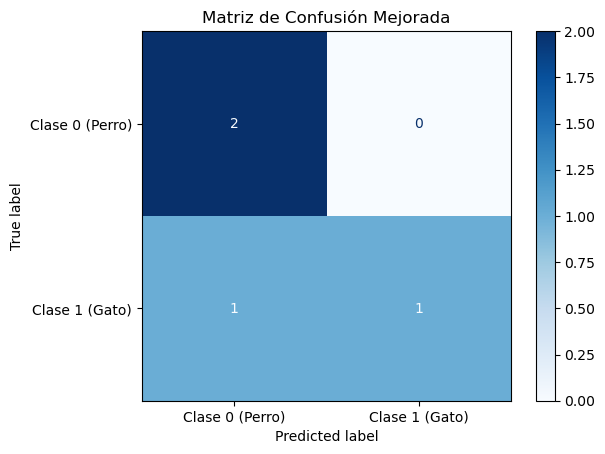

In [216]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Obtener predicciones
y_pred = modelo.predict(val_data)
y_pred = np.round(y_pred).astype(int)  # Convertir a 0 o 1
y_true = val_data.classes  # Clases reales

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Usar la función incorporada de sklearn para visualizarla
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Clase 0 (Perro)", "Clase 1 (Gato)"])
disp.plot(cmap="Blues", values_format='d')  # Mostrar números enteros
plt.title("Matriz de Confusión Mejorada")
plt.show()


Imagenes:
https://www.tensorflow.org/datasets/catalog/cats_vs_dogs?utm_source=chatgpt.com&hl=es


